# System Price forecasting

#### Af Thomas Hoffmann Nielsen

##### Importer pakker og hent data

In [4]:
import pandas as pd
import os
from classmate import Proces, splitFeat, splitvar, Estimation, Model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from statsmodels.tsa.arima_model import ARMA
from xgboost import XGBRegressor
import warnings 
warnings.filterwarnings('ignore') 

os.chdir('C:/Users/Thomas/Google Drive/py/electricity')

df = pd.read_excel("datdaily.xlsx",sheet_name="Sheet1", index_col='Datetime', parse_dates=['Datetime'])

df = df.resample('D').sum() 


##### Rens for seasonality

In [5]:
sys = df['SYS']

df['yclean'], df['seas'] = Proces(sys).season()





Data is stationary


##### Split data og tilføj features

In [6]:
dftrain, dftest = splitFeat(df,365)

y_true_train, y_train, x_train, seas_train = splitvar(dftrain)
y_true_test, y_test, x_test, seas_test = splitvar(dftest)

##### Lav instance af estimation class og definér modeller

In [7]:
estimator = Estimation(y_true_train, y_train, x_train, seas_train,y_true_test, y_test, x_test, seas_test)

rf = Model("Random Forest",RandomForestRegressor(n_estimators=100),False)
gbm = Model("Gradient Tree Boosting",GradientBoostingRegressor(n_estimators=100),False)
xg = Model("XGBoost",XGBRegressor(n_estimators=100),False)
arma = Model("ARMA(7,7)",ARMA(y_train,order=(7,7)),True)

##### Tilføj modeller til estimation class og estimer bedste model

Random Forest added
Gradient Tree Boosting added
XGBoost added
ARMA(7,7) added
Estimates based on Random Forest created
Estimates based on Gradient Tree Boosting created
Estimates based on XGBoost created
Estimates based on ARMA(7,7) created
Random Forest AE calculated
Gradient Tree Boosting AE calculated
XGBoost AE calculated
ARMA(7,7) AE calculated
Final model(s): ['Random Forest', 'Gradient Tree Boosting'] with mae of 3.3722398883363285


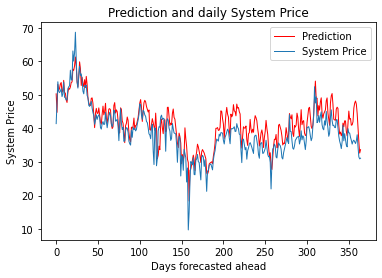

In [8]:
estimator.add_model(rf)
estimator.add_model(gbm)
estimator.add_model(xg)
estimator.add_model(arma)

estimator.estimate()